In [1]:
import pyvisa as visa
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
rm = visa.ResourceManager()
rm.list_resources()

('GPIB0::11::INSTR',
 'GPIB0::13::INSTR',
 'GPIB0::7::INSTR',
 'USB0::0x2A8D::0x1797::CN58056431::0::INSTR',
 'USB0::0x2A8D::0x1797::CN58056440::0::INSTR',
 'USB0::0x2A8D::0x1797::CN58056487::0::INSTR',
 'USB0::0x2A8D::0x1797::CN58236321::0::INSTR',
 'USB0::0x2A8D::0x1797::CN58236378::0::INSTR',
 'USB0::0x2A8D::0x1797::CN58236416::0::INSTR',
 'USB0::0x2A8D::0xB318::MY58270034::0::INSTR',
 'USB0::0x2A8D::0xB318::MY58320020::0::INSTR',
 'USB0::0x2A8D::0xB318::MY58320025::0::INSTR',
 'USB0::0x2A8D::0xB318::MY58330001::0::INSTR',
 'USB0::0x2A8D::0xB318::MY58330049::0::INSTR')

In [3]:
st_in = rm.open_resource('GPIB0::7::INSTR', write_termination= '\n', read_termination='\n')

In [4]:
st_in.query('*IDN?')

'Stanford_Research_Systems,SR830,s/n49531,ver1.07 '

In [5]:
data = pd.DataFrame(columns=['I_mag', 'V_gen', 'X', 'Y', 'R', 'theta', 'Points'], dtype=np.float)
J = 0

# ОТСЮДА

In [6]:
# INIT
I_mag = J # A
V_gen = 5 # V
POINTS = 23 # 1: A, 2: B, 3: C 


z_time = time.time()
c_time = z_time

data = pd.DataFrame(columns=['I_mag', 'V_gen', 'X', 'Y', 'R', 'theta', 'Points'], dtype=np.float)

data.head()

while (c_time - z_time <= 2):
    X = float(st_in.query('OUTP ? 1'))
    Y = float(st_in.query('OUTP ? 2'))
    R = float(st_in.query('OUTP ? 3'))
    theta = float(st_in.query('OUTP ? 4'))
    
    #V2 = get_data(2)
    data = data.append({'I_mag': I_mag, 'V_gen': V_gen, 'X': X, 'Y': Y, 'R': R, 'theta': theta, 'Points': POINTS}, ignore_index=True)
    c_time = time.time()
data.to_csv(str(J) + '.csv', sep=';')
J += 1

In [8]:
df = pd.read_csv(str(J-1) + '.csv', delimiter=';', index_col=0)  
df.head()

,I_mag,V_gen,X,Y,R,theta,Points
0,0.0,5.0,0.000018,6.072260e-07,0.000018,1.98,23.0
1,0.0,5.0,0.000018,6.072260e-07,0.000018,1.98,23.0
2,0.0,5.0,0.000018,6.072260e-07,0.000018,1.98,23.0
3,0.0,5.0,0.000018,6.072260e-07,0.000018,1.98,23.0
4,0.0,5.0,0.000018,6.072260e-07,0.000018,1.98,23.0


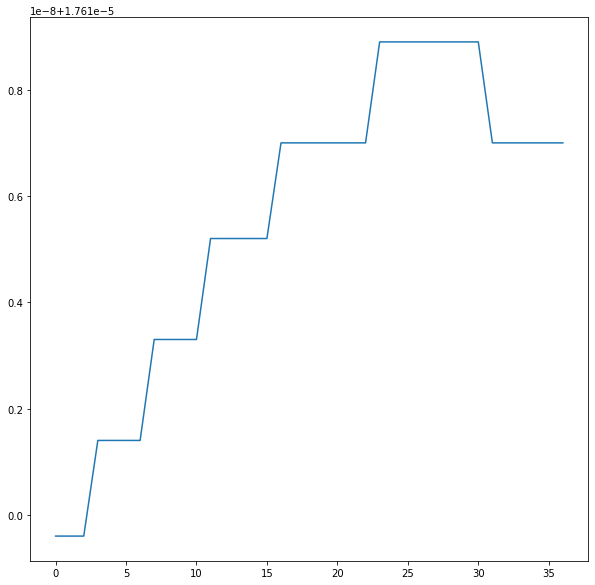

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(data['X'].values.size), data['X'])
plt.show()